In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [137]:
df = pd.read_csv(r'Daily_Water_Intake.csv')

In [138]:
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [140]:
df.shape

(30000, 7)

In [141]:
df.duplicated().sum()

np.int64(338)

In [142]:
df.drop_duplicates()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor
...,...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold,Good
29996,49,Female,109,5.32,High,Hot,Good
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good


In [143]:
df.isnull().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

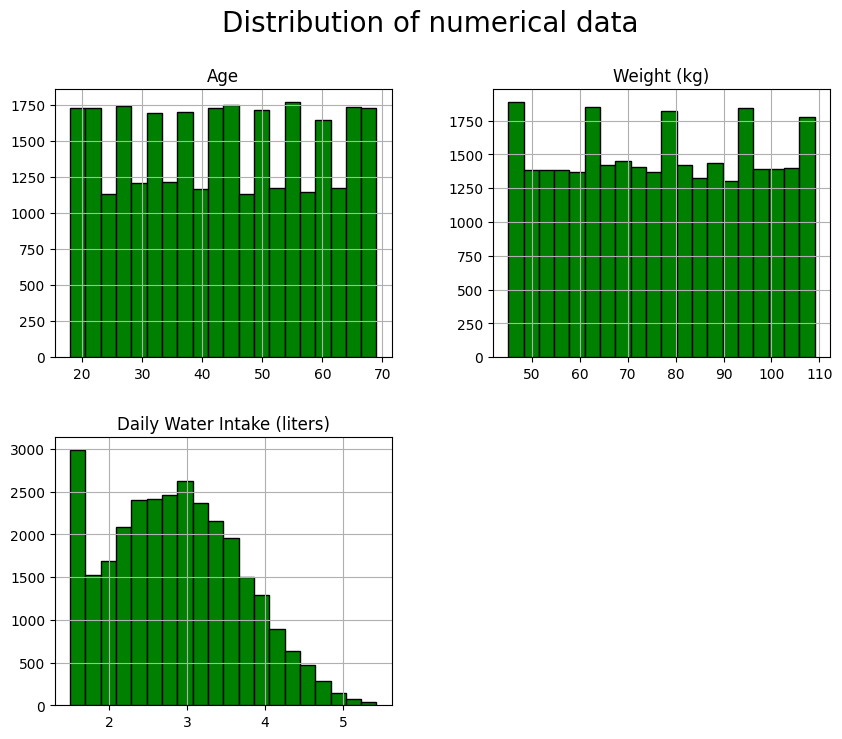

In [144]:


num_cols = ['Age','Weight (kg)','Daily Water Intake (liters)']
df[num_cols].hist(bins=20, figsize=(10,8), color="green", edgecolor="black")
plt.suptitle("Distribution of numerical data", fontsize=20)
plt.show()

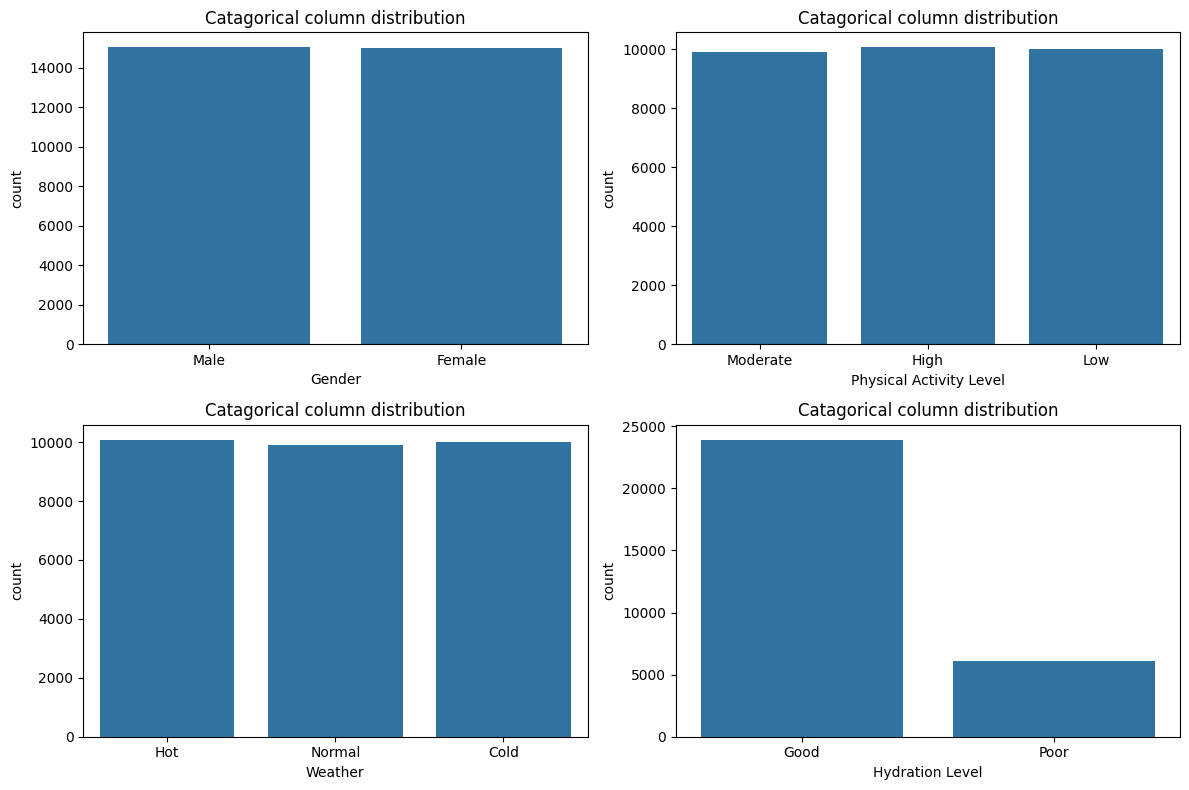

In [145]:
cat_cols = ['Gender','Physical Activity Level','Weather','Hydration Level']
plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data = df, x=col)
    plt.title("Catagorical column distribution")
    
plt.tight_layout()
plt.show()

In [146]:
pivot_table = pd.pivot_table(df,values='Hydration Level',index='Physical Activity Level',columns='Gender',aggfunc='count')
pivot_table

Gender,Female,Male
Physical Activity Level,,
High,5005,5064
Low,4989,5022
Moderate,4974,4946


In [147]:
pivot_table = pd.pivot_table(df,values='Hydration Level',index='Physical Activity Level',columns='Weather',aggfunc='count')
pivot_table

Weather,Cold,Hot,Normal
Physical Activity Level,,,
High,3386,3383,3300
Low,3259,3434,3318
Moderate,3367,3264,3289


<Axes: xlabel='Age', ylabel='Daily Water Intake (liters)'>

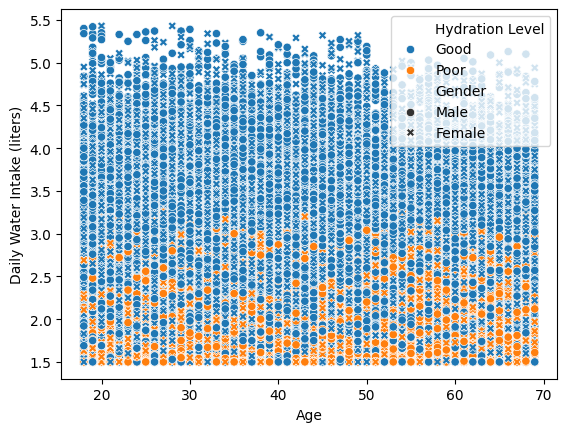

In [148]:
sns.scatterplot(df,x='Age',y='Daily Water Intake (liters)',hue='Hydration Level',style='Gender')

<Axes: xlabel='Age', ylabel='Hydration Level'>

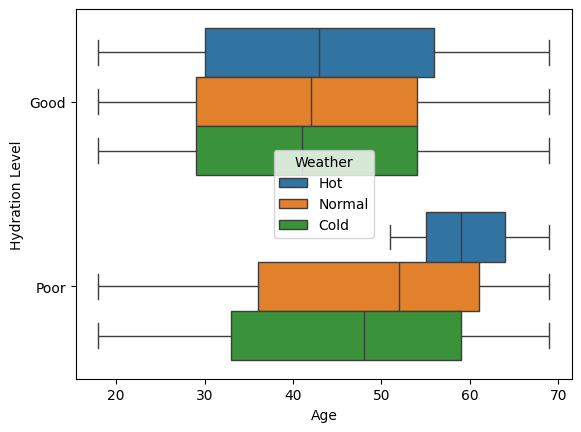

In [149]:
sns.boxplot(df,y='Hydration Level',x='Age',hue='Weather')

<Axes: xlabel='Age', ylabel='Hydration Level'>

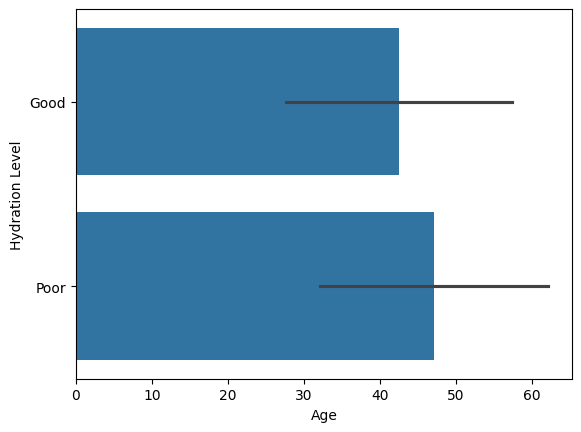

In [150]:
sns.barplot(data = df,x='Age',y='Hydration Level' ,estimator='mean',errorbar="sd")

<Axes: xlabel='Hydration Level', ylabel='Weight (kg)'>

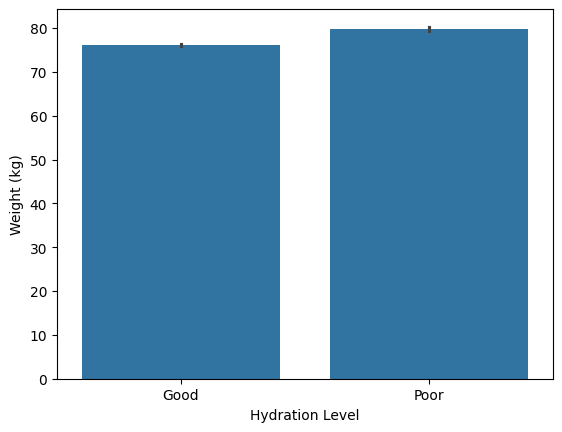

In [151]:
sns.barplot(df,x="Hydration Level",y="Weight (kg)")

In [152]:
df['Age category']=pd.cut(df['Age'],bins = [0,18,30,45,60,100],labels=["<18","18-30","31-45","46-60","60+"])

In [153]:
df

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level,Age category
0,56,Male,96,4.23,Moderate,Hot,Good,46-60
1,60,Male,105,3.95,High,Normal,Good,46-60
2,36,Male,68,2.39,Moderate,Cold,Good,31-45
3,19,Female,74,3.13,Moderate,Hot,Good,18-30
4,38,Male,77,2.11,Low,Normal,Poor,31-45
...,...,...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold,Good,46-60
29996,49,Female,109,5.32,High,Hot,Good,46-60
29997,56,Female,54,1.50,Moderate,Cold,Poor,46-60
29998,36,Male,106,4.00,Low,Hot,Good,31-45


In [154]:
df['Age category'].value_counts()

Age category
31-45    8677
46-60    8578
18-30    6982
60+      5215
<18       548
Name: count, dtype: int64

<Axes: xlabel='Age category', ylabel='count'>

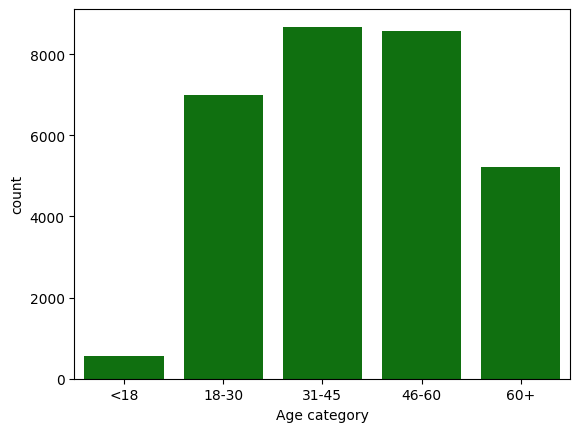

In [155]:
sns.countplot(df,x='Age category',color='green')

<Axes: xlabel='Physical Activity Level', ylabel='Daily Water Intake (liters)'>

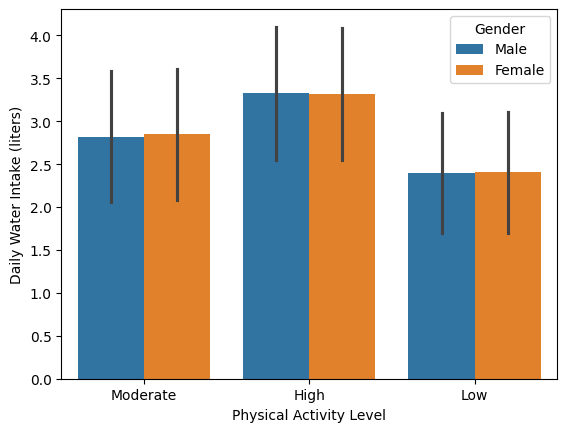

In [156]:
sns.barplot(data=df,x='Physical Activity Level',y='Daily Water Intake (liters)',hue='Gender',estimator='mean',errorbar='sd')

In [157]:
df

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level,Age category
0,56,Male,96,4.23,Moderate,Hot,Good,46-60
1,60,Male,105,3.95,High,Normal,Good,46-60
2,36,Male,68,2.39,Moderate,Cold,Good,31-45
3,19,Female,74,3.13,Moderate,Hot,Good,18-30
4,38,Male,77,2.11,Low,Normal,Poor,31-45
...,...,...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold,Good,46-60
29996,49,Female,109,5.32,High,Hot,Good,46-60
29997,56,Female,54,1.50,Moderate,Cold,Poor,46-60
29998,36,Male,106,4.00,Low,Hot,Good,31-45


<Axes: xlabel='Weight (kg)', ylabel='Daily Water Intake (liters)'>

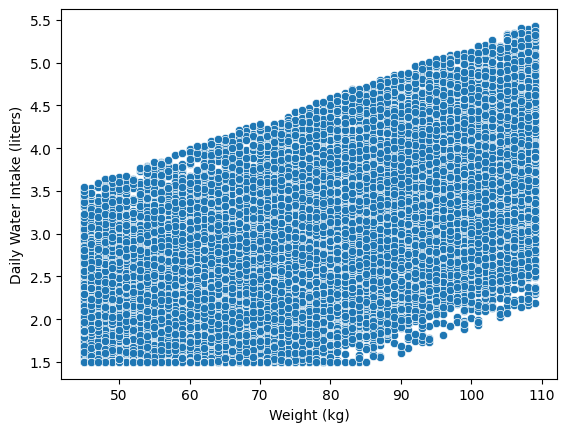

In [158]:
sns.scatterplot(data=df,x='Weight (kg)',y='Daily Water Intake (liters)')

<Axes: xlabel='Physical Activity Level', ylabel='Daily Water Intake (liters)'>

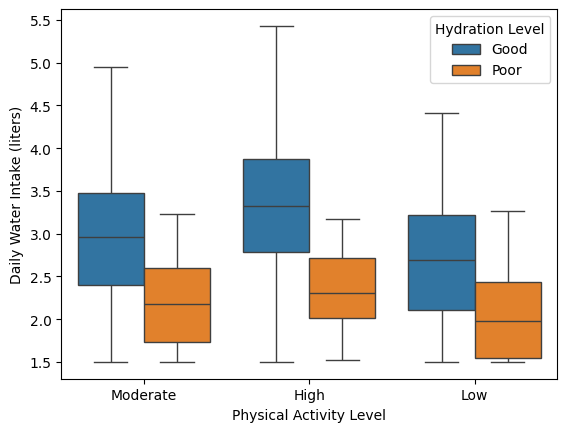

In [159]:
sns.boxplot(data=df,x='Physical Activity Level',y='Daily Water Intake (liters)',hue='Hydration Level')

<Axes: xlabel='Hydration Level', ylabel='Daily Water Intake (liters)'>

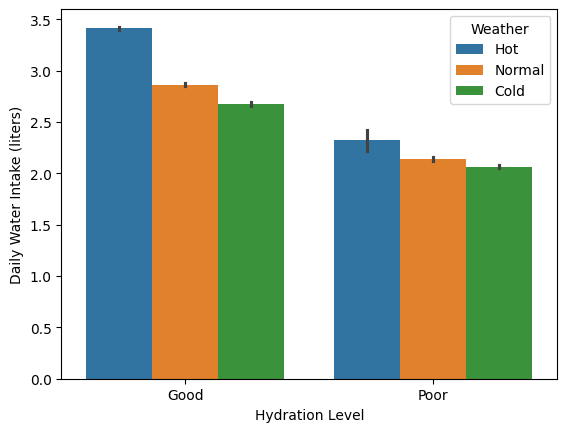

In [160]:
sns.barplot(data=df,x='Hydration Level',y='Daily Water Intake (liters)',hue='Weather')

<Axes: >

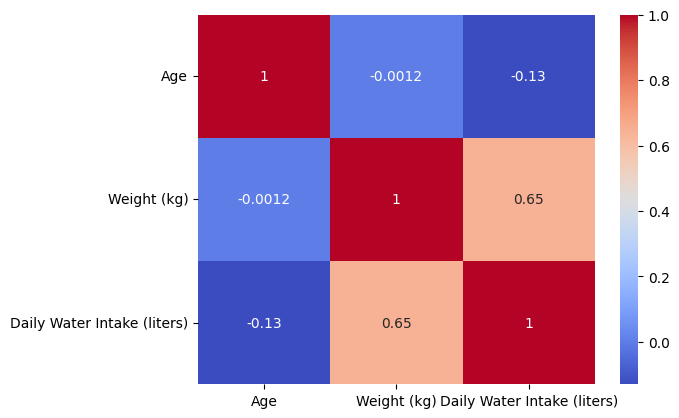

In [161]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import joblib

In [163]:
df['Hydration Level'].unique()

array(['Good', 'Poor'], dtype=object)

In [164]:
df

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level,Age category
0,56,Male,96,4.23,Moderate,Hot,Good,46-60
1,60,Male,105,3.95,High,Normal,Good,46-60
2,36,Male,68,2.39,Moderate,Cold,Good,31-45
3,19,Female,74,3.13,Moderate,Hot,Good,18-30
4,38,Male,77,2.11,Low,Normal,Poor,31-45
...,...,...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold,Good,46-60
29996,49,Female,109,5.32,High,Hot,Good,46-60
29997,56,Female,54,1.50,Moderate,Cold,Poor,46-60
29998,36,Male,106,4.00,Low,Hot,Good,31-45


In [165]:
x=df[['Age','Gender','Weight (kg)','Daily Water Intake (liters)','Physical Activity Level','Weather']]
y=df['Hydration Level']

In [166]:
cat_cols=['Gender', 'Physical Activity Level', 'Weather']
label_encoders={}

In [167]:
for col in cat_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])
    label_encoders[col] = le 

    joblib.dump(le,f"label_encoder_{col}.pkl")

C:\Users\subha\AppData\Local\Temp\ipykernel_504\4114060882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\subha\AppData\Local\Temp\ipykernel_504\4114060882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.fit_transform(x[col])
C:\Users\subha\AppData\Local\Temp\ipykernel_504\4114060882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [168]:
num_cols

['Age', 'Weight (kg)', 'Daily Water Intake (liters)']

In [169]:
scaler = MinMaxScaler()
x[num_cols]=scaler.fit_transform(x[num_cols])

joblib.dump(scaler,"scaler.pkl")

C:\Users\subha\AppData\Local\Temp\ipykernel_504\2002123241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[num_cols]=scaler.fit_transform(x[num_cols])


['scaler.pkl']

In [170]:
le = LabelEncoder()
y = le.fit_transform(y)
joblib.dump(le,"Hydration_level_encoder.pkl")

['Hydration_level_encoder.pkl']

In [171]:
y

array([0, 0, 0, ..., 1, 0, 0], shape=(30000,))

In [172]:
x

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather
0,0.745098,1,0.796875,0.694656,2,1
1,0.823529,1,0.937500,0.623410,0,2
2,0.352941,1,0.359375,0.226463,2,0
3,0.019608,0,0.453125,0.414758,2,1
4,0.392157,1,0.500000,0.155216,1,2
...,...,...,...,...,...,...
29995,0.568627,1,0.812500,0.496183,2,0
29996,0.607843,0,1.000000,0.972010,0,1
29997,0.745098,0,0.140625,0.000000,2,0
29998,0.352941,1,0.953125,0.636132,1,1


In [173]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [175]:
def evaluate_model(model,x_train,x_test,y_train,y_test):
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    re = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return {"Accuracy Score" : ac, "Precision Score" : pre, "recall Score" : re,"f1 Score":f1}

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

results = {}

# ---------------- Logistic Regression ----------------

lr = LogisticRegression(max_iter=1000)

lr.fit(x_train, y_train)

results["Logistic Regression"] = evaluate_model(
    lr, x_train, x_test, y_train, y_test
)

print("Logistic Regression model trained")


# ---------------- Random Forest Classifier ----------------

rf = RandomForestClassifier()

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    rf,
    rf_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(x_train, y_train)

best_rf = rf_grid.best_estimator_

results["Random Forest Classifier"] = evaluate_model(
    best_rf, x_train, x_test, y_train, y_test
)

print("Random Forest Training completed, best parameters:", rf_grid.best_params_)


# ---------------- KNN Classifier ----------------

best_k = 0
best_score = 0

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_k = k

print("Best K Value:", best_k)
print("Best Accuracy:", best_score)

# Final Model with Best K
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(x_train, y_train)

results["KNeighbors Classifier"] = evaluate_model(
    final_model, x_train, x_test, y_train, y_test
)

print("\nKNeighbors Classifier training completed with:", best_k, "neighbors")


# ---------------- Decision Tree Classifier ----------------

dt = DecisionTreeClassifier()

dt_params = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

dt_grid = GridSearchCV(
    dt,
    dt_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=0
)

dt_grid.fit(x_train, y_train)

best_dt = dt_grid.best_estimator_

results["Decision Tree Classifier"] = evaluate_model(
    best_dt,
    x_train,
    x_test,
    y_train,
    y_test
)

print("Decision Tree Training completed, best parameters:", dt_grid.best_params_)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4788
           1       1.00      0.95      0.97      1212

    accuracy                           0.99      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.99      0.99      0.99      6000

[[4786    2]
 [  62 1150]]
Logistic Regression model trained
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4788
           1       0.99      0.97      0.98      1212

    accuracy                           0.99      6000
   macro avg       0.99      0.98      0.99      6000
weighted avg       0.99      0.99      0.99      6000

[[4772   16]
 [  37 1175]]
Random Forest Training completed, best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best K Value: 1
Best Accuracy: 0.9695
              precision    recall  f1-score   support

           0       0.98     

In [177]:
results

{'Logistic Regression': {'Accuracy Score': 0.9893333333333333,
  'Precision Score': 0.9982638888888888,
  'recall Score': 0.9488448844884488,
  'f1 Score': 0.9729272419627749},
 'Random Forest Classifier': {'Accuracy Score': 0.9911666666666666,
  'Precision Score': 0.9865659109991604,
  'recall Score': 0.9694719471947195,
  'f1 Score': 0.9779442363712026},
 'KNeighbors Classifier': {'Accuracy Score': 0.9695,
  'Precision Score': 0.9262634631317316,
  'recall Score': 0.9224422442244224,
  'f1 Score': 0.9243489045059942},
 'Decision Tree Classifier': {'Accuracy Score': 0.9981666666666666,
  'Precision Score': 0.9966914805624483,
  'recall Score': 0.9942244224422442,
  'f1 Score': 0.9954564229657167}}

In [178]:
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy Score', ascending=False)
results_df

,Accuracy Score,Precision Score,recall Score,f1 Score
Decision Tree Classifier,0.998167,0.996691,0.994224,0.995456
Random Forest Classifier,0.991167,0.986566,0.969472,0.977944
Logistic Regression,0.989333,0.998264,0.948845,0.972927
KNeighbors Classifier,0.969500,0.926263,0.922442,0.924349


In [179]:
models = {
    'Logistic Regression':lr,
    'Random Forest Classifier':best_rf,
    'KNeighbors Classifier':final_model,
    'Decision Tree Classifier':best_dt
}

In [180]:
best_Accuracy_score = results_df["Accuracy Score"].max()
best_Accuracy_score

np.float64(0.9981666666666666)

In [181]:
top_model = results_df[results_df['Accuracy Score'] == best_Accuracy_score]
top_model

,Accuracy Score,Precision Score,recall Score,f1 Score
Decision Tree Classifier,0.998167,0.996691,0.994224,0.995456


In [182]:
best_model = models[top_model.index[0]]

In [183]:
best_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [184]:
joblib.dump(best_model,"best_model.pkl")

['best_model.pkl']